# SPY

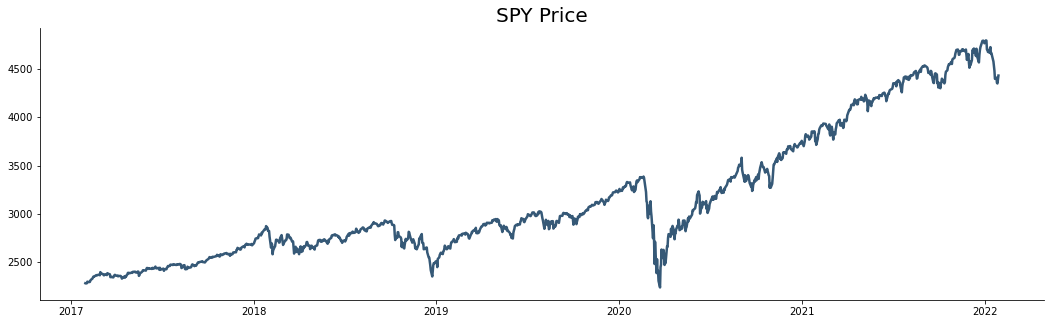

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df1 = pd.read_csv('spy.csv', index_col='Date', parse_dates=True)
df1.drop(columns="Unnamed: 0", inplace=True)
# Visualize
plt.title('SPY Price', size=20)
plt.plot(df1);

In [28]:
df1


,Close
Date,
2017-01-30,2280.899902
2017-01-31,2278.870117
2017-02-01,2279.550049
2017-02-02,2280.850098
2017-02-03,2297.419922
...,...
2022-01-21,4397.939941
2022-01-24,4410.129883
2022-01-25,4356.450195


In [29]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [30]:
df1

,Close
Date,
2017-01-30,2280.899902
2017-01-31,2278.870117
2017-02-01,2279.550049
2017-02-02,2280.850098
2017-02-03,2297.419922
...,...
2022-01-21,4397.939941
2022-01-24,4410.129883
2022-01-25,4356.450195


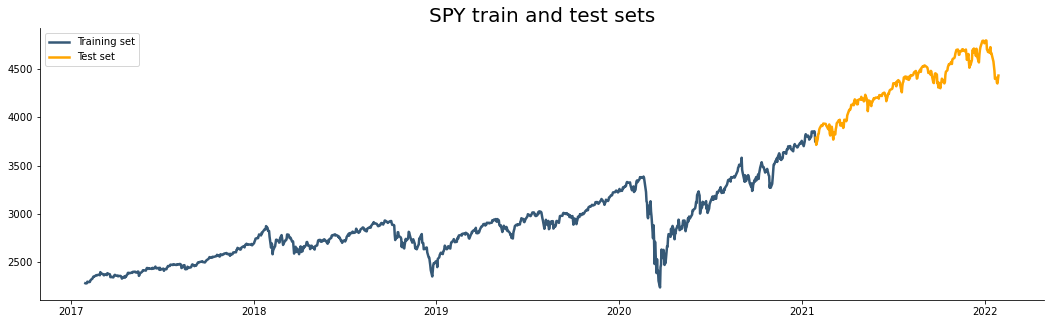

In [31]:
test_size1 = 253


df_train1 = df1[:-test_size1]
df_test1 = df1[-test_size1:]

plt.title('SPY train and test sets', size=20)
plt.plot(df_train1, label='Training set')
plt.plot(df_test1, label='Test set', color='orange')
plt.legend();

In [32]:
from fbprophet import Prophet as proph

In [33]:
df_train1

,Close
Date,
2017-01-30,2280.899902
2017-01-31,2278.870117
2017-02-01,2279.550049
2017-02-02,2280.850098
2017-02-03,2297.419922
...,...
2021-01-21,3853.070068
2021-01-22,3841.469971
2021-01-25,3855.360107


In [34]:
df_train1.reset_index(inplace=True)

In [35]:
df_test1

,Close
Date,
2021-01-28,3787.379883
2021-01-29,3714.239990
2021-02-01,3773.860107
2021-02-02,3826.310059
2021-02-03,3830.169922
...,...
2022-01-21,4397.939941
2022-01-24,4410.129883
2022-01-25,4356.450195


In [36]:
df_test1.reset_index(inplace=True)

In [37]:
# Rename the columns [Date,AAPL] to [ds, y]

ts1 = df_train1

ts1 = df_train1.rename(columns={'Date': 'ds',
                        'Close': 'y'})

ts_test1 = df_test1.rename(columns={'Date': 'ds',
                        'Close': 'y'})
ts1.head(5)


,ds,y
0,2017-01-30,2280.899902
1,2017-01-31,2278.870117
2,2017-02-01,2279.550049
3,2017-02-02,2280.850098
4,2017-02-03,2297.419922


In [38]:
ts1.tail()

,ds,y
1001,2021-01-21,3853.070068
1002,2021-01-22,3841.469971
1003,2021-01-25,3855.360107
1004,2021-01-26,3849.620117
1005,2021-01-27,3750.770020


In [39]:
x_test1 = ts_test1[['ds']]

In [40]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model1 = proph(interval_width=0.95,daily_seasonality=True)

In [41]:
# Fit the timeseries into Model
Model1.fit(ts1)

In [42]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates1 = Model1.make_future_dataframe(periods=759, freq='D')
future_dates1.tail()


,ds
1760,2023-02-21
1761,2023-02-22
1762,2023-02-23
1763,2023-02-24
1764,2023-02-25


In [43]:
future_dates1

,ds
0,2017-01-30
1,2017-01-31
2,2017-02-01
3,2017-02-02
4,2017-02-03
...,...
1760,2023-02-21
1761,2023-02-22
1762,2023-02-23
1763,2023-02-24


In [44]:
future_dates1= future_dates1.loc[future_dates1['ds'] >= '2021-01-22']

In [45]:
x_test1 = pd.DataFrame(x_test1)

In [46]:
x_test1

,ds
0,2021-01-28
1,2021-01-29
2,2021-02-01
3,2021-02-02
4,2021-02-03
...,...
248,2022-01-21
249,2022-01-24
250,2022-01-25
251,2022-01-26


In [47]:
# Predict the values for future dates and take the head of forecast

predicitons1 = Model1.predict(x_test1)


In [48]:
forecast1 = Model1.predict(future_dates1)

In [49]:
forecast1.head() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,3765.210256,3732.513490,4030.598826,3765.210256,3765.210256,119.470796,119.470796,119.470796,33.903811,...,2.054177,2.054177,2.054177,83.512808,83.512808,83.512808,0.0,0.0,0.0,3884.681052
1,2021-01-25,3775.293331,3739.622998,4035.152576,3775.293331,3775.293331,115.032883,115.032883,115.032883,33.903811,...,-0.893485,-0.893485,-0.893485,82.022557,82.022557,82.022557,0.0,0.0,0.0,3890.326214
2,2021-01-26,3778.654356,3742.388177,4041.127438,3778.654356,3778.654356,117.714478,117.714478,117.714478,33.903811,...,3.062481,3.062481,3.062481,80.748186,80.748186,80.748186,0.0,0.0,0.0,3896.368834
3,2021-01-27,3782.015381,3747.179338,4041.427982,3782.015381,3782.015381,115.572279,115.572279,115.572279,33.903811,...,2.472020,2.472020,2.472020,79.196448,79.196448,79.196448,0.0,0.0,0.0,3897.587660
4,2021-01-28,3785.376406,3751.981672,4058.327183,3785.376406,3785.376406,113.128116,113.128116,113.128116,33.903811,...,1.780763,1.780763,1.780763,77.443542,77.443542,77.443542,0.0,0.0,0.0,3898.504522


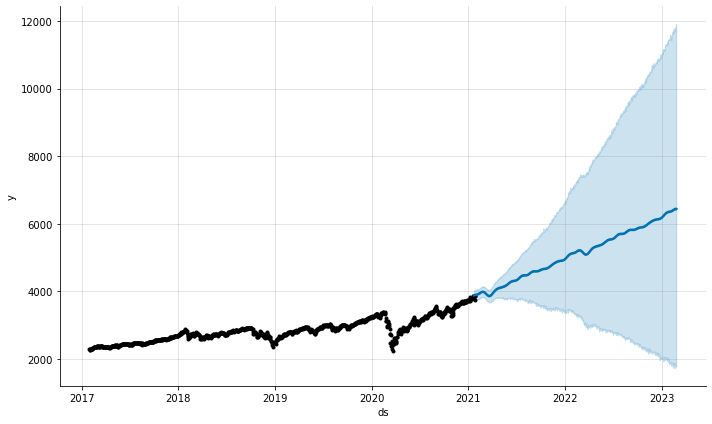

In [50]:
# Use prophet's plot function to plot the predictions

Model1.plot(forecast1, uncertainty=True)
plt.show()

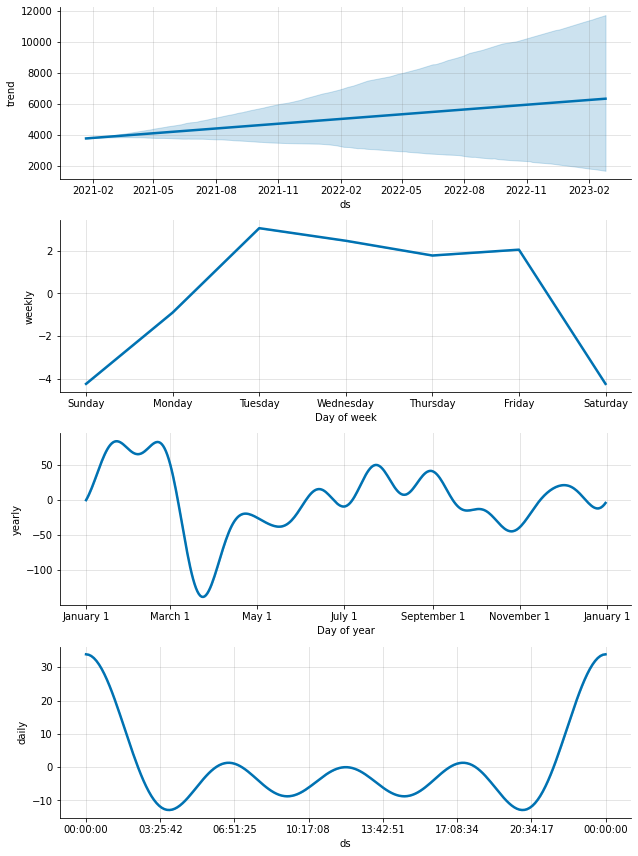

In [51]:
Model1.plot_components(forecast1)
plt.show()

In [52]:
df_test1 = pd.concat([df_test1,predicitons1], axis=1)
df_test1

,Date,Close,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-28,3787.379883,2021-01-28,3785.376406,3753.826664,4044.154342,3785.376406,3785.376406,113.128116,113.128116,...,1.780763,1.780763,1.780763,77.443542,77.443542,77.443542,0.0,0.0,0.0,3898.504522
1,2021-01-29,3714.239990,2021-01-29,3788.737431,3752.221347,4044.930113,3788.737431,3788.737431,111.527011,111.527011,...,2.054177,2.054177,2.054177,75.569023,75.569023,75.569023,0.0,0.0,0.0,3900.264442
2,2021-02-01,3773.860107,2021-02-01,3798.820506,3748.548651,4059.422084,3797.285632,3799.335394,103.024853,103.024853,...,-0.893485,-0.893485,-0.893485,70.014527,70.014527,70.014527,0.0,0.0,0.0,3901.845359
3,2021-02-02,3826.310059,2021-02-02,3802.181531,3754.181826,4057.666834,3799.678283,3803.506728,105.403679,105.403679,...,3.062481,3.062481,3.062481,68.437387,68.437387,68.437387,0.0,0.0,0.0,3907.585211
4,2021-02-03,3830.169922,2021-02-03,3805.542557,3753.755424,4056.550422,3802.174536,3807.483798,103.483724,103.483724,...,2.472020,2.472020,2.472020,67.107893,67.107893,67.107893,0.0,0.0,0.0,3909.026280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-21,4397.939941,2022-01-21,4988.623375,3331.711606,6998.782846,3272.191173,6899.322287,118.811971,118.811971,...,2.054177,2.054177,2.054177,82.853983,82.853983,82.853983,0.0,0.0,0.0,5107.435346
249,2022-01-24,4410.129883,2022-01-24,4998.706450,3383.467175,7081.534388,3264.191477,6942.399289,116.128716,116.128716,...,-0.893485,-0.893485,-0.893485,83.118390,83.118390,83.118390,0.0,0.0,0.0,5114.835166
250,2022-01-25,4356.450195,2022-01-25,5002.067475,3413.028824,7073.263434,3257.028397,6956.744579,119.255665,119.255665,...,3.062481,3.062481,3.062481,82.289373,82.289373,82.289373,0.0,0.0,0.0,5121.323140
251,2022-01-26,4349.930176,2022-01-26,5005.428500,3373.228791,7030.559882,3249.865317,6971.089870,117.471485,117.471485,...,2.472020,2.472020,2.472020,81.095654,81.095654,81.095654,0.0,0.0,0.0,5122.899985


In [53]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,3765.210256,3732.513490,4030.598826,3765.210256,3765.210256,119.470796,119.470796,119.470796,33.903811,...,2.054177,2.054177,2.054177,83.512808,83.512808,83.512808,0.0,0.0,0.0,3884.681052
1,2021-01-25,3775.293331,3739.622998,4035.152576,3775.293331,3775.293331,115.032883,115.032883,115.032883,33.903811,...,-0.893485,-0.893485,-0.893485,82.022557,82.022557,82.022557,0.0,0.0,0.0,3890.326214
2,2021-01-26,3778.654356,3742.388177,4041.127438,3778.654356,3778.654356,117.714478,117.714478,117.714478,33.903811,...,3.062481,3.062481,3.062481,80.748186,80.748186,80.748186,0.0,0.0,0.0,3896.368834
3,2021-01-27,3782.015381,3747.179338,4041.427982,3782.015381,3782.015381,115.572279,115.572279,115.572279,33.903811,...,2.472020,2.472020,2.472020,79.196448,79.196448,79.196448,0.0,0.0,0.0,3897.587660
4,2021-01-28,3785.376406,3751.981672,4058.327183,3785.376406,3785.376406,113.128116,113.128116,113.128116,33.903811,...,1.780763,1.780763,1.780763,77.443542,77.443542,77.443542,0.0,0.0,0.0,3898.504522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,2023-02-21,6319.589295,1804.372835,11818.720258,1698.983710,11681.209610,119.386638,119.386638,119.386638,33.903811,...,3.062481,3.062481,3.062481,82.420346,82.420346,82.420346,0.0,0.0,0.0,6438.975933
759,2023-02-22,6322.950320,1765.846220,11747.415579,1692.308196,11694.863677,118.201707,118.201707,118.201707,33.903811,...,2.472020,2.472020,2.472020,81.825876,81.825876,81.825876,0.0,0.0,0.0,6441.152027
760,2023-02-23,6326.311345,1772.756055,11810.877949,1685.632681,11708.667511,116.173416,116.173416,116.173416,33.903811,...,1.780763,1.780763,1.780763,80.488842,80.488842,80.488842,0.0,0.0,0.0,6442.484761
761,2023-02-24,6329.672370,1781.077234,11921.695386,1678.957167,11723.332787,114.297234,114.297234,114.297234,33.903811,...,2.054177,2.054177,2.054177,78.339246,78.339246,78.339246,0.0,0.0,0.0,6443.969604


In [54]:
mean_squared_error(df_test1.Close,df_test1.yhat,squared=False)

187.27406867415917

In [55]:
concat_df = forecast1.loc[forecast1['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

,ds,yhat
370,2022-01-29,5121.222046
371,2022-01-30,5122.670316
372,2022-01-31,5127.482025
373,2022-02-01,5133.001300
374,2022-02-02,5134.142254
...,...,...
758,2023-02-21,6438.975933
759,2023-02-22,6441.152027
760,2023-02-23,6442.484761
761,2023-02-24,6443.969604


In [56]:
concat_df.set_index('ds',inplace=True)

In [57]:
concat_df

,yhat
ds,
2022-01-29,5121.222046
2022-01-30,5122.670316
2022-01-31,5127.482025
2022-02-01,5133.001300
2022-02-02,5134.142254
...,...
2023-02-21,6438.975933
2023-02-22,6441.152027
2023-02-23,6442.484761


In [58]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 393 entries, 2022-01-29 to 2023-02-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [59]:
concat_df.columns = ['y']

In [60]:
df_test1

,Date,Close,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-28,3787.379883,2021-01-28,3785.376406,3753.826664,4044.154342,3785.376406,3785.376406,113.128116,113.128116,...,1.780763,1.780763,1.780763,77.443542,77.443542,77.443542,0.0,0.0,0.0,3898.504522
1,2021-01-29,3714.239990,2021-01-29,3788.737431,3752.221347,4044.930113,3788.737431,3788.737431,111.527011,111.527011,...,2.054177,2.054177,2.054177,75.569023,75.569023,75.569023,0.0,0.0,0.0,3900.264442
2,2021-02-01,3773.860107,2021-02-01,3798.820506,3748.548651,4059.422084,3797.285632,3799.335394,103.024853,103.024853,...,-0.893485,-0.893485,-0.893485,70.014527,70.014527,70.014527,0.0,0.0,0.0,3901.845359
3,2021-02-02,3826.310059,2021-02-02,3802.181531,3754.181826,4057.666834,3799.678283,3803.506728,105.403679,105.403679,...,3.062481,3.062481,3.062481,68.437387,68.437387,68.437387,0.0,0.0,0.0,3907.585211
4,2021-02-03,3830.169922,2021-02-03,3805.542557,3753.755424,4056.550422,3802.174536,3807.483798,103.483724,103.483724,...,2.472020,2.472020,2.472020,67.107893,67.107893,67.107893,0.0,0.0,0.0,3909.026280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-21,4397.939941,2022-01-21,4988.623375,3331.711606,6998.782846,3272.191173,6899.322287,118.811971,118.811971,...,2.054177,2.054177,2.054177,82.853983,82.853983,82.853983,0.0,0.0,0.0,5107.435346
249,2022-01-24,4410.129883,2022-01-24,4998.706450,3383.467175,7081.534388,3264.191477,6942.399289,116.128716,116.128716,...,-0.893485,-0.893485,-0.893485,83.118390,83.118390,83.118390,0.0,0.0,0.0,5114.835166
250,2022-01-25,4356.450195,2022-01-25,5002.067475,3413.028824,7073.263434,3257.028397,6956.744579,119.255665,119.255665,...,3.062481,3.062481,3.062481,82.289373,82.289373,82.289373,0.0,0.0,0.0,5121.323140
251,2022-01-26,4349.930176,2022-01-26,5005.428500,3373.228791,7030.559882,3249.865317,6971.089870,117.471485,117.471485,...,2.472020,2.472020,2.472020,81.095654,81.095654,81.095654,0.0,0.0,0.0,5122.899985


In [61]:
df2 = df_test1[['Date','Close']]

In [62]:
df2.set_index('Date',inplace=True)

In [63]:
temp_ds = ts1.set_index('ds')

In [64]:
df2.columns = ['y']

In [65]:
final_df= pd.concat([temp_ds,df2,concat_df])
final_df

,y
2017-01-30,2280.899902
2017-01-31,2278.870117
2017-02-01,2279.550049
2017-02-02,2280.850098
2017-02-03,2297.419922
...,...
2023-02-21,6438.975933
2023-02-22,6441.152027
2023-02-23,6442.484761
2023-02-24,6443.969604


In [66]:
#final_df.to_csv('SPY_final.csv')

In [69]:
ROI = (4431.850098/6438.020249)*100
ROI

68.83871014056514

# Plotting

In [67]:
import matplotlib.pyplot as plt
import plotly.express as px